In [111]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
CSV_PATH = 'raw/lichess_db_standard_rated_2025-12-sample7.csv'

with open(CSV_PATH, newline='') as csvfile:
    df = pd.read_csv(csvfile)

In [113]:
# First look
df.head()

,Event,Site,UTCDate,UTCTime,White,Black,Result,WhiteElo,BlackElo,TimeControl,Termination,PlyCount,MoveCount
0,Rated Blitz game,https://lichess.org/8LwiNwZm,2025.12.01,00:00:13,Izamutdin,Raximov_Toshpolat,0-1,1811,1831,300+0,Normal,106,53
1,Rated Blitz game,https://lichess.org/6Flf8x0r,2025.12.01,00:00:13,RC-UTOAAGI,tomallen99,1-0,2062,2061,300+0,Normal,65,33
2,Rated Blitz game,https://lichess.org/vlJZrPaq,2025.12.01,00:00:13,Bruggor,Nitinagg,0-1,1765,1752,300+0,Time forfeit,114,57
3,Rated Blitz game,https://lichess.org/1p2hqIJf,2025.12.01,00:00:13,MalteseKnight,kirimba,1/2-1/2,1081,1103,300+0,Normal,34,17
4,Rated Blitz game,https://lichess.org/GT7IDdXC,2025.12.01,00:00:13,ifeelgood78,Yenisei-aguila,0-1,1786,1799,300+0,Normal,74,37


In [114]:
df.describe()

,WhiteElo,BlackElo,PlyCount,MoveCount
count,243548.000000,243548.000000,243548.000000,243548.000000
mean,1670.954650,1670.853672,66.799194,33.657394
std,399.564401,399.818861,30.331962,15.161755
min,400.000000,400.000000,0.000000,0.000000
25%,1393.000000,1392.000000,46.000000,23.000000
50%,1687.000000,1687.000000,63.000000,32.000000
75%,1951.000000,1951.000000,84.000000,42.000000
max,3217.000000,3224.000000,374.000000,187.000000


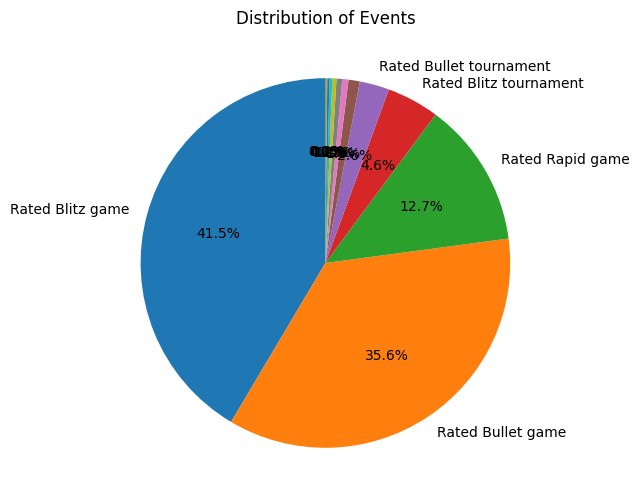

In [115]:
# Remove links from event types
rating_types = ["Rated ", ""]
game_types = ['game', 'tournament', 'swiss']
event_types = ['Blitz', 'Bullet', 'Rapid', 'UltraBullet', 'Classical', 'Correspondence']

known_types = []
for rating_type in rating_types:
    for game_type in game_types:
        for event_type in event_types:
            event_name = f"{rating_type}{event_type} {game_type}"
            known_types.append(event_name)

for event_name in known_types:
    l = len(event_name)
    mask = (df["Event"].str[0:l] == event_name)
    df.loc[mask,"Event Name"] = event_name

# Reorder Event Name column
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index("Event Name")))
df = df[cols]

# Visualize distribution of event types
event_counts = df["Event Name"].value_counts()
percentages = event_counts / event_counts.sum() * 100

labels = [
    name if pct >= 1 else ""
    for name, pct in zip(event_counts.index, percentages)
]

plt.figure(figsize=(6, 6))
plt.pie(event_counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90)
plt.title("Distribution of Events")
plt.show()

In [116]:
# Filter down dataset by game type, we are looking only for Rapid
df_rapid = df[df["Event"].str.contains("Rapid")]
df_rapid.head()

,Event Name,Event,Site,UTCDate,UTCTime,White,Black,Result,WhiteElo,BlackElo,TimeControl,Termination,PlyCount,MoveCount
21,Rated Rapid game,Rated Rapid game,https://lichess.org/WBUBfWck,2025.12.01,00:00:14,Thaily_yaml,MyIllusion,0-1,726,787,600+0,Normal,17,9
22,Rated Rapid game,Rated Rapid game,https://lichess.org/nXafeSF8,2025.12.01,00:00:14,oukaise,sungtwins,1-0,816,793,600+0,Normal,57,29
23,Rated Rapid game,Rated Rapid game,https://lichess.org/JdJxgg7t,2025.12.01,00:00:14,albamar,ash955,1-0,1539,1539,600+0,Normal,49,25
24,Rated Rapid game,Rated Rapid game,https://lichess.org/MQYARpxn,2025.12.01,00:00:14,ArturBentlin,Ara_1984,1-0,683,560,600+0,Normal,117,59
25,Rated Rapid game,Rated Rapid game,https://lichess.org/sUNemc7p,2025.12.01,00:00:14,Rutendobts,amrsalim8888,1-0,1762,1738,600+0,Normal,97,49


In [117]:
df_rapid.describe()

,WhiteElo,BlackElo,PlyCount,MoveCount
count,33978.000000,33978.000000,33978.000000,33978.000000
mean,1476.989729,1476.724086,65.502354,33.010860
std,366.878345,367.155710,34.916752,17.454651
min,400.000000,400.000000,0.000000,0.000000
25%,1211.000000,1210.000000,41.000000,21.000000
50%,1497.000000,1495.000000,60.000000,30.000000
75%,1748.000000,1749.000000,85.000000,43.000000
max,3033.000000,3037.000000,351.000000,176.000000


In [118]:
# Filter down dataset by elo, we are looking only for those at least within 300 of the average

MIN_ELO = 1200
MAX_ELO = 1800

df_elo = df_rapid[(df_rapid["WhiteElo"] > MIN_ELO) & (df_rapid["WhiteElo"] < MAX_ELO) & (df_rapid["BlackElo"] > MIN_ELO) & (df_rapid["BlackElo"] < MAX_ELO)]
df_elo.describe()

,WhiteElo,BlackElo,PlyCount,MoveCount
count,17161.000000,17161.000000,17161.000000,17161.000000
mean,1508.596003,1508.355865,66.012645,33.267234
std,160.995894,161.493749,33.895493,16.943861
min,1201.000000,1201.000000,0.000000,0.000000
25%,1375.000000,1373.000000,42.000000,21.000000
50%,1508.000000,1511.000000,60.000000,30.000000
75%,1644.000000,1644.000000,85.000000,43.000000
max,1799.000000,1799.000000,287.000000,144.000000


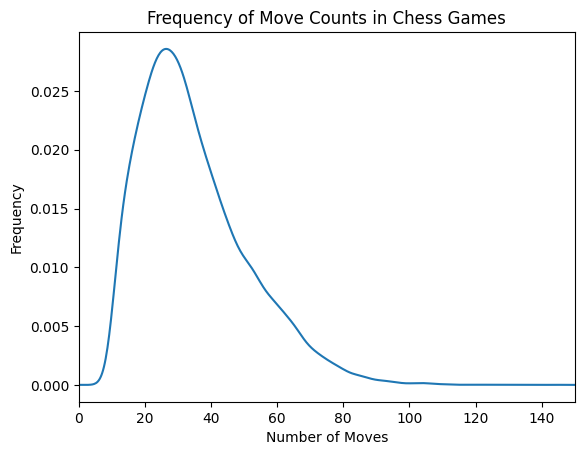

In [119]:
# Filter down dataset by amount of moves made (no instant resigns / aborts)

df_mv = df_elo[(df_elo["MoveCount"] > 10)]

ax = df_mv["MoveCount"].plot(
    kind="kde"
)

ax.set_xlim(0, 150)
ax.set_xlabel("Number of Moves")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Move Counts in Chess Games")
plt.show()

In [120]:
df_mv.describe()

,WhiteElo,BlackElo,PlyCount,MoveCount
count,16253.000000,16253.000000,16253.000000,16253.000000
mean,1510.746016,1510.601058,68.944933,34.733465
std,160.906998,161.091610,32.388113,16.189572
min,1201.000000,1201.000000,21.000000,11.000000
25%,1377.000000,1376.000000,45.000000,23.000000
50%,1512.000000,1514.000000,63.000000,32.000000
75%,1646.000000,1646.000000,87.000000,44.000000
max,1799.000000,1799.000000,287.000000,144.000000


In [122]:
500_000 * (1 / (16 / 243))

7593749.999999999